In [ ]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

<b>Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?</b>

In [58]:
arr = np.array([120000])
arr_value_rate_per_year = np.array([])
for i in range(1, 6):
    value = arr[i-1] + (arr[i-1] * 0.05)
    arr_value_rate_per_year = np.append(arr_value_rate_per_year, arr[i-1] * 0.05)
    arr = np.append(arr, value)

arr_value_rate_per_year = arr_value_rate_per_year/12
arr_increase_value_per_month = np.arange(60).reshape(5, 12)

for i in range(0, 5):
    arr_increase_value_per_month[i].fill(arr_value_rate_per_year[i])

arr_increase_value_per_month = arr_increase_value_per_month.cumsum() + 120000
house_price = arr_increase_value_per_month[len(arr_increase_value_per_month)-1]
print(f"Orientacyjna cena mieszkania wynosi: {house_price} zł")

Orientacyjna cena mieszkania wynosi: 153132 zł


<b>Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?</b>

In [59]:
amount_periods = 60
proc = 0.05/12
initial_capital = 1000
payment_per_month = npf.pmt(proc, amount_periods, -initial_capital, house_price)
print(f"Co miesiąc muszę wpłacać {np.abs(round(payment_per_month,2))} zł")

Co miesiąc muszę wpłacać 2232.87 zł


<b>Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.</b>

In [61]:
periods = np.arange(1,5*12+1,dtype=int)
deposit_values_by_five_years = np.around(npf.ppmt(proc, periods, amount_periods, -house_price),2).cumsum()
deposit_values_by_five_years


array([  2251.74,   4512.86,   6783.4 ,   9063.4 ,  11352.9 ,  13651.94,
        15960.56,  18278.8 ,  20606.7 ,  22944.3 ,  25291.64,  27648.76,
        30015.7 ,  32392.51,  34779.22,  37175.87,  39582.51,  41999.18,
        44425.92,  46862.77,  49309.77,  51766.97,  54234.41,  56712.13,
        59200.17,  61698.58,  64207.4 ,  66726.67,  69256.44,  71796.75,
        74347.64,  76909.16,  79481.35,  82064.26,  84657.93,  87262.41,
        89877.74,  92503.97,  95141.14,  97789.3 , 100448.5 , 103118.78,
       105800.18, 108492.75, 111196.54, 113911.6 , 116637.97, 119375.7 ,
       122124.84, 124885.43, 127657.53, 130441.18, 133236.42, 136043.31,
       138861.9 , 141692.23, 144534.35, 147388.32, 150254.18, 153131.98])

In [62]:
arr_increase_value_per_month

array([120500, 121000, 121500, 122000, 122500, 123000, 123500, 124000,
       124500, 125000, 125500, 126000, 126525, 127050, 127575, 128100,
       128625, 129150, 129675, 130200, 130725, 131250, 131775, 132300,
       132851, 133402, 133953, 134504, 135055, 135606, 136157, 136708,
       137259, 137810, 138361, 138912, 139490, 140068, 140646, 141224,
       141802, 142380, 142958, 143536, 144114, 144692, 145270, 145848,
       146455, 147062, 147669, 148276, 148883, 149490, 150097, 150704,
       151311, 151918, 152525, 153132])

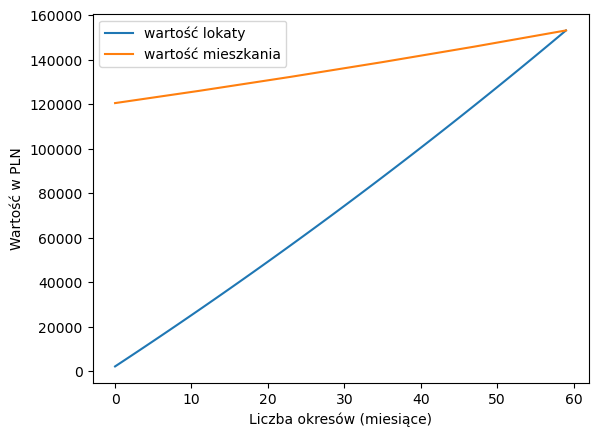

In [63]:
plt.plot(deposit_values_by_five_years,label='wartość lokaty')
plt.plot(arr_increase_value_per_month,label='wartość mieszkania')
plt.xlabel('Liczba okresów (miesiące)')
plt.ylabel('Wartość w PLN')
plt.legend()
plt.show()
